<a href="https://colab.research.google.com/github/marquezlucas/ds/blob/main/e_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
[Link a la presentacion](https://github.com/marquezlucas/ds/blob/main/Interacción%20final%20de%20clientes%20%20E-Commerce.pdf)
```



# Importaciones

In [ ]:
#@title Las librerias

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib as mpl

import matplotlib.pyplot as plt

import re  # Import the regular expression module

In [ ]:
#@title Los archivos desde github

tcd = pd.read_csv('https://raw.githubusercontent.com/marquezlucas/ds/main/customer_details.csv')
tec = pd.read_csv('https://raw.githubusercontent.com/marquezlucas/ds/main/E-commerece%20sales%20data%202024.csv')
tpd = pd.read_csv('https://raw.githubusercontent.com/marquezlucas/ds/main/product_details.csv')


# Investigo las tablas


##tabla_customer_details

In [ ]:
tcd.shape

(3900, 18)

In [ ]:
tcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
tcd.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
tcd.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


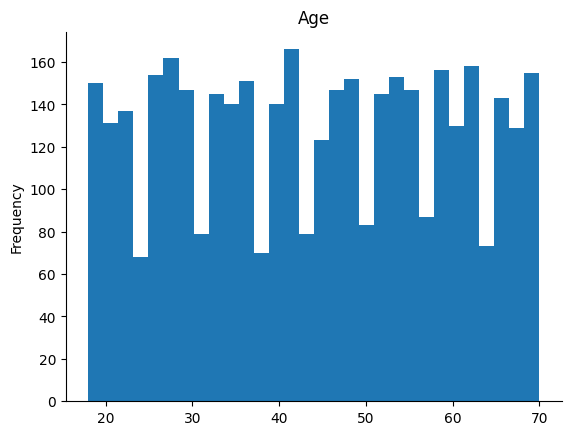

In [ ]:
# @title Age

tcd['Age'].plot(kind='hist', bins=30, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

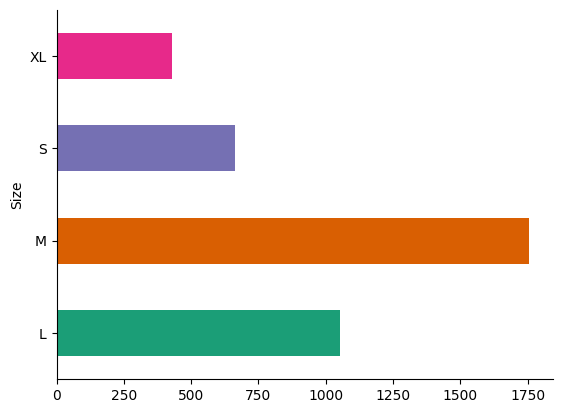

In [ ]:
# @title Size type

# Busco algún tipo de diferencia entre las diferentes segmentaciones dentro de la columna 'Interaction type'
tcd.groupby('Size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

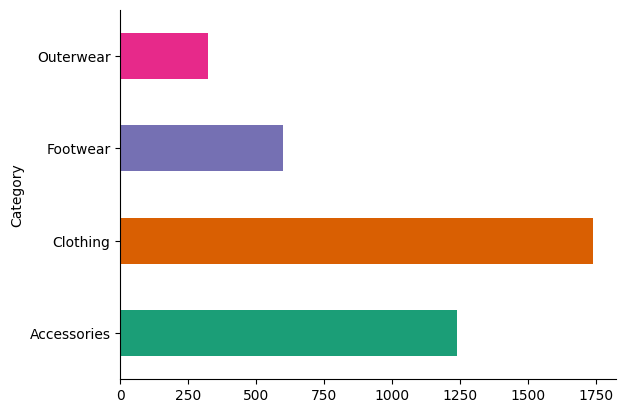

In [ ]:
# @title Category type

# Busco algún tipo de diferencia entre las diferentes segmentaciones dentro de la columna 'Interaction type'
tcd.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

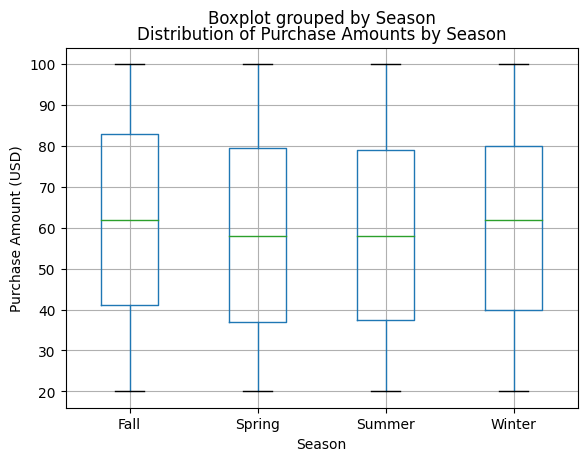

In [ ]:
# @title Distribution of Purchase Amounts by Season

tcd.boxplot(column='Purchase Amount (USD)', by='Season')
plt.title('Distribution of Purchase Amounts by Season')
plt.xlabel('Season')
_ = plt.ylabel('Purchase Amount (USD)')

###Veo cuanta es la cantidad de nulos

In [ ]:
# Calculo la cantidad de valores nulos por columna
tcd_nulos_por_columna = tcd.isnull().sum()

# Muestra la cantidad de nulos por columna
print(tcd_nulos_por_columna)

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


Podria sacar "Discount Applied", "Promo Code Used", "Previous Purchases", "Payment Method", "Frequency of Purchases"¿?

##tabla_e_commerce

In [ ]:
tec.shape

(3294, 5)

In [ ]:
tec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user id           2999 non-null   float64
 1   product id        2999 non-null   object 
 2   Interaction type  2871 non-null   object 
 3   Time stamp        2999 non-null   object 
 4   Unnamed: 4        0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 128.8+ KB


In [ ]:
tec.columns

Index(['user id', 'product id', 'Interaction type', 'Time stamp',
       'Unnamed: 4'],
      dtype='object')

In [ ]:
tec.tail()

,user id,product id,Interaction type,Time stamp,Unnamed: 4
3289,NaN,NaN,NaN,NaN,NaN
3290,NaN,NaN,NaN,NaN,NaN
3291,NaN,NaN,NaN,NaN,NaN
3292,NaN,NaN,NaN,NaN,NaN
3293,NaN,NaN,NaN,NaN,NaN


In [ ]:
#como me trajo varios nulos utilizo sample para ver si puedo encontrar otra muestra que me de más información
tec.sample(10)

,user id,product id,Interaction type,Time stamp,Unnamed: 4
2400,2401.0,b4d405dd62c397a61dc9762ff8cb8830,view,25/11/2023 8:00,NaN
734,735.0,5cdfd80e4c5dacc09bbf09c4258d3806,like,24/11/2023 8:00,NaN
1663,1664.0,be325b96528ccb919e52994437ae9ee4,like,04/12/2023 8:00,NaN
2696,2697.0,b9f97b6126d00b9e9b21ebda916c935f,purchase,29/05/2023 10:00,NaN
2668,2669.0,b90d8f15c5b5257430a78b63c02e2f82,purchase,01/05/2023 10:00,NaN
2179,2180.0,f48fbf5455ffe1cca1c9031504c0e6df,like,09/04/2023 10:00,NaN
1913,1914.0,b064b77fdc0659ff824d76a616d884c7,like,05/11/2023 8:00,NaN
1151,1152.0,b5247aea955ce4c28856f9b2cebefcfc,view,26/10/2023 8:00,NaN
2545,2546.0,086b5d48ee1e6616ef6eace369c76a88,like,29/12/2022 10:00,NaN
3189,NaN,NaN,NaN,NaN,NaN


In [ ]:
tec.values

array([[1.0, '4c69b61db1fc16e7013b43fc926e502d', 'purchase',
        '10/10/2023 8:00', nan],
       [2.0, '66d49bbed043f5be260fa9f7fbff5957', 'view',
        '11/10/2023 8:00', nan],
       [3.0, '2c55cae269aebf53838484b0d7dd931a', 'like',
        '12/10/2023 8:00', nan],
       ...,
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]], dtype=object)

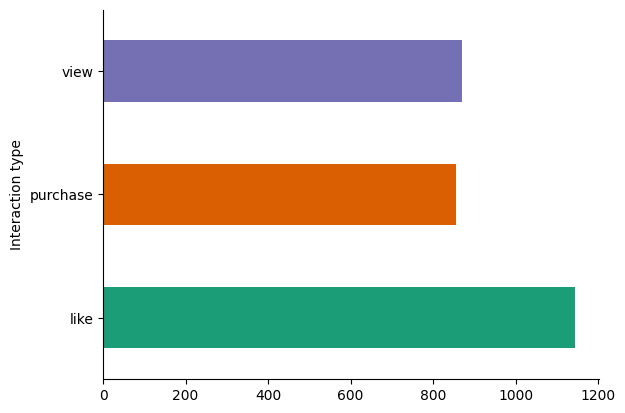

In [ ]:
# @title Interaction type

# Busco algún tipo de diferencia entre las diferentes segmentaciones dentro de la columna 'Interaction type'
tec.groupby('Interaction type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###Veo cuanta es la cantidad de nulos

In [ ]:
# Calculo la cantidad de valores nulos por columna
tec_nulos_por_columna = tec.isnull().sum()

# Muestra la cantidad de nulos por columna
print(tec_nulos_por_columna)

user id              295
product id           295
Interaction type     423
Time stamp           295
Unnamed: 4          3294
dtype: int64


###Eliminación de variables vacias


In [ ]:
#Utilizo la función drop para eliminar las variables
tec_2 = tec.drop(["Unnamed: 4"],axis =1)

print(tec_2)

      user id                        product id Interaction type  \
0         1.0  4c69b61db1fc16e7013b43fc926e502d         purchase   
1         2.0  66d49bbed043f5be260fa9f7fbff5957             view   
2         3.0  2c55cae269aebf53838484b0d7dd931a             like   
3         4.0  18018b6bc416dab347b1b7db79994afa             view   
4         5.0  e04b990e95bf73bbe6a3fa09785d7cd0             like   
...       ...                               ...              ...   
3289      NaN                               NaN              NaN   
3290      NaN                               NaN              NaN   
3291      NaN                               NaN              NaN   
3292      NaN                               NaN              NaN   
3293      NaN                               NaN              NaN   

           Time stamp  
0     10/10/2023 8:00  
1     11/10/2023 8:00  
2     12/10/2023 8:00  
3     13/10/2023 8:00  
4     14/10/2023 8:00  
...               ...  
3289           

##tabla_product_details

In [ ]:
tpd.shape

(10002, 28)

In [ ]:
tpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniqe Id               10002 non-null  object 
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8230 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

In [ ]:
tpd.columns

Index(['Uniqe Id', 'Product Name', 'Brand Name', 'Asin', 'Category',
       'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity',
       'Model Number', 'About Product', 'Product Specification',
       'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image',
       'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details',
       'Dimensions', 'Color', 'Ingredients', 'Direction To Use',
       'Is Amazon Seller', 'Size Quantity Variant', 'Product Description'],
      dtype='object')

In [ ]:
tpd.sample(10)

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
6028,6d84749eb3e7c87364933e1a9d774457,"26"" Hanging Disney Princess Decorations, 3ct",NaN,NaN,Toys & Games | Party Supplies,NaN,NaN,$3.99,NaN,59968,...,https://www.amazon.com/Unique-Industries-Hangi...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
6584,ebb39cbb9c491c53a28858514c522c30,Rasta Imposta Flag USA Dress,NaN,NaN,"Clothing, Shoes & Jewelry | Costumes & Accesso...",NaN,NaN,$22.73,NaN,NaN,...,https://www.amazon.com/Rasta-Imposta-Dress-Whi...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3239,8f507f78a964d249bf1e921aa6a46b99,"Us-Games Uncoated Economy Foam Ball, 6-Inch",NaN,NaN,Sports & Outdoors | Sports & Fitness | Leisure...,NaN,NaN,$7.78,NaN,MSFOAM6X,...,https://www.amazon.com/Us-Games-Uncoated-Econo...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
6611,377c1dba989092d43e8e9a659d7056d7,Rubie's Costume DC Superheroes Batgirl Sequin ...,NaN,NaN,Toys & Games | Dress Up & Pretend Play | Costumes,NaN,NaN,$20.99,NaN,610750_TODD,...,https://www.amazon.com/Rubies-Costume-Superher...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1931,9edc3a7ac9498f29d8f143622e4c56cf,"""NHL Ice Time! Collection"" Inflatable Hockey S...",NaN,NaN,Sports & Outdoors | Sports & Fitness | Team Sp...,NaN,NaN,$8.57,NaN,393280,...,https://www.amazon.com/Amscan-Tailgating-Infla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1373,b558654e47e0b1f28ceb5dd1db6ddfa9,"Learning Resources Beaker Creatures Series 2, ...",NaN,NaN,Toys & Games | Learning & Education,NaN,NaN,$23.98,NaN,LER3825,...,https://www.amazon.com/Learning-Resources-Beak...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3992,cf322f412adbe1a074a6f2669fe04149,Marvin's Magic 25 Mind Blowing Incredible Card...,NaN,NaN,Toys & Games | Novelty & Gag Toys | Magic Kits...,NaN,NaN,$17.61,NaN,MMB5706,...,https://www.amazon.com/Marvins-Magic-Incredibl...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
9880,b272705532004f6a8d3eb37a1fb9da1d,Chill Sack Bean Bag Chair: Large 2' Memory Foa...,NaN,NaN,Home & Kitchen | Furniture | Kids' Furniture |...,NaN,NaN,$82.70,NaN,AMZ-KSK-MS13,...,https://www.amazon.com/Chill-Sack-Bean-Bag-Cha...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1343,0b426a352404f34aefcc842bf746bc5a,Melissa & Doug Sunny Patch Cutie Pie Butterfly...,NaN,NaN,Toys & Games | Sports & Outdoor Play | Nature ...,NaN,NaN,$7.99,NaN,6704,...,https://www.amazon.com/Melissa-Doug-Butterfly-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
9951,f907d004fd9587a9b5aad7808d719285,"Losi Rear Driveshaft Set: Baja Rey, LOS232005",NaN,NaN,Toys & Games | Hobbies | Remote & App Controll...,NaN,NaN,$59.99,NaN,LOS232005,...,https://www.amazon.com/Losi-Rear-Driveshaft-Se...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


###Veo cuanta es la cantidad de nulos

In [ ]:
# Calculo la cantidad de valores nulos por columna
tpd_nulos_por_columna = tpd.isnull().sum()

# Muestra la cantidad de nulos por columna
print(tpd_nulos_por_columna)

Uniqe Id                     0
Product Name                 0
Brand Name               10002
Asin                     10002
Category                   830
Upc Ean Code              9968
List Price               10002
Selling Price              107
Quantity                 10002
Model Number              1772
About Product              273
Product Specification     1632
Technical Details          790
Shipping Weight           1138
Product Dimensions        9523
Image                        0
Variants                  7524
Sku                      10002
Product Url                  0
Stock                    10002
Product Details          10002
Dimensions               10002
Color                    10002
Ingredients              10002
Direction To Use         10002
Is Amazon Seller             0
Size Quantity Variant    10002
Product Description      10002
dtype: int64


In [ ]:
"Product Name","Upc Ean Code","Variants",

('Product Name', 'Upc Ean Code', 'Variants')

Se visualiza que 13 de las 28 variables estan vacias por lo que se descartaran de la tabla. Ademas, hay 2 variables con demasiados nulos y 2 variables que se consideraron irrelevante para determinar la variable objetivo por lo que tambien se eliminan.  

###Eliminación de variables vacias



In [ ]:
#Utilizo la función drop para eliminar las variables
tpd_2 = tpd.drop(["Technical Details","Product Name","Brand Name","Upc Ean Code","Asin","Variants","List Price","Quantity","Sku","Stock","Product Details","Dimensions","Color","Ingredients","Direction To Use","Size Quantity Variant","Product Description"],axis =1)

In [ ]:
tpd_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Uniqe Id               10002 non-null  object
 1   Category               9172 non-null   object
 2   Selling Price          9895 non-null   object
 3   Model Number           8230 non-null   object
 4   About Product          9729 non-null   object
 5   Product Specification  8370 non-null   object
 6   Shipping Weight        8864 non-null   object
 7   Product Dimensions     479 non-null    object
 8   Image                  10002 non-null  object
 9   Product Url            10002 non-null  object
 10  Is Amazon Seller       10002 non-null  object
dtypes: object(11)
memory usage: 859.7+ KB


###Se busca determinar como continuar con el resto de las variables.

In [ ]:
tpd_2.Category.value_counts()

Category
Toys & Games | Games & Accessories | Board Games                                                                                           284
Toys & Games | Puzzles | Jigsaw Puzzles                                                                                                    274
Toys & Games | Stuffed Animals & Plush Toys | Stuffed Animals & Teddy Bears                                                                252
Toys & Games | Toy Figures & Playsets | Action Figures                                                                                     235
Toys & Games | Party Supplies                                                                                                              193
                                                                                                                                          ... 
Toys & Games | Hobbies | Remote & App Controlled Vehicles & Parts | Remote & App Controlled Vehicle Parts | Servos & Parts | Servo Ar

In [ ]:
tpd_2.value_counts(["Is Amazon Seller"])

Is Amazon Seller
Y                   9723
N                    279
Name: count, dtype: int64

In [ ]:
tpd_2

,Uniqe Id,Category,Selling Price,Model Number,About Product,Product Specification,Shipping Weight,Product Dimensions,Image,Product Url,Is Amazon Seller
0,4c69b61db1fc16e7013b43fc926e502d,Sports & Outdoors | Outdoor Recreation | Skate...,$237.68,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,Y
1,66d49bbed043f5be260fa9f7fbff5957,Toys & Games | Learning & Education | Science ...,$99.95,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4 pounds,14.7 x 11.1 x 10.2 inches 4.06 pounds,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Electronic-Circuits-Cla...,Y
2,2c55cae269aebf53838484b0d7dd931a,Toys & Games | Arts & Crafts | Craft Kits,$34.99,NaN,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/3Doodler-Plastic-Innova...,Y
3,18018b6bc416dab347b1b7db79994afa,Toys & Games | Hobbies | Models & Model Kits |...,$28.91,142,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Guillow-Airplane-Design...,Y
4,e04b990e95bf73bbe6a3fa09785d7cd0,Toys & Games | Puzzles | Jigsaw Puzzles,$17.49,62151,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Woodstock-Collage-500-p...,Y
...,...,...,...,...,...,...,...,...,...,...,...
9997,1a22f23576bfdfe5ed6c887dc117aab6,Toys & Games | Learning & Education | Counting...,$9.31,REM536B,NaN,Product Dimensions: 11 x 8.5 x 0.4 inc...,4.8 ounces,11 x 8.5 x 0.4 inches 1.6 ounces,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Remedia-Publications-RE...,Y
9998,e11514dcf1f087887cd5ea0bd646d1fc,Toys & Games | Arts & Crafts,$6.99,NaN,Make sure this fits by entering your model num...,ProductDimensions:3x6.5x0.3inches|ItemWeight:0...,0.96 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Trends-International-NF...,Y
9999,c00301a38560da2abc89c1f86ce4b267,Office Products | Office & School Supplies | E...,$37.95,34-6015,Make sure this fits by entering your model num...,Product Dimensions: 18 x 11.9 x 0.7 in...,2.8 pounds,18 x 11.9 x 0.7 inches 2.75 pounds,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/NewPath-Learning-Scienc...,Y
10000,c2928dbf9796ceba44863a2736afb405,Toys & Games | Arts & Crafts | Craft Kits,$3.58,2888PRST,NaN,ProductDimensions:7x7x2inches|ItemWeight:6.1ou...,6.1 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Disney-Princess-Yoursel...,Y


In [ ]:
tpd_2.sample(10)

,Uniqe Id,Category,Selling Price,Model Number,About Product,Product Specification,Shipping Weight,Product Dimensions,Image,Product Url,Is Amazon Seller
3471,4ad2fa081c76bfc3bd7be2b070ee06e8,Toys & Games | Party Supplies,$21.99,73923,Make sure this fits by entering your model num...,ProductDimensions:14.8x9.9x2.3inches|ItemWeigh...,1.45 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Forum-Novelties-Maker-C...,Y
7319,387a49858468cfe880c9f49a82cac3d7,Toys & Games | Party Supplies | Cake & Cupcake...,$5.39,UO-CT-AC-0041,Make sure this fits by entering your model num...,ProductDimensions:1x7x5inches|ItemWeight:2.4ou...,2.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Unik-Occasions-Lesbian-...,Y
641,870b1970e9328e5123a78fe4e4417e79,Toys & Games | Puzzles | Jigsaw Puzzles,$15.99,1372,Make sure this fits by entering your model num...,ProductDimensions:10x12x2inches|ItemWeight:1.6...,1.69 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/White-Mountain-Puzzles-...,Y
7807,c6ffd833ac8767aaa5bdb41317c49229,Toys & Games | Dress Up & Pretend Play | Prete...,$26.79,26211P,Make sure this fits by entering your model num...,ProductDimensions:5x19x12.5inches|ItemWeight:3...,3.55 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Kitchen-Battery-Operate...,Y
2280,3b1cda1513f867faa89db789d3cbf775,NaN,$74.83,JPBLGC,Make sure this fits by entering your model num...,ProductDimensions:11.2x2.8x12.2inches|ItemWeig...,2.15 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Areaware-Blockitecture-...,Y
5842,926c35cfa98eeffd9af5761bb32c5217,Toys & Games | Sports & Outdoor Play | Play Se...,$130.00,MM00152,Make sure this fits by entering your model num...,ProductDimensions:46x46x64inches|ItemWeight:9....,9.25 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Sales-Enterprises-Rider...,Y
8504,b12166017a2d60947518e1e7491be0e5,Hobbies | Remote & App Controlled Vehicles & P...,$19.99,EFLU2920,"E-flite Main Wing: UMX Radian, EFLU2920",ProductDimensions:31.3x4.2x3.1inches|ItemWeigh...,1 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/flite-Main-Wing-Ultra-R...,Y
8121,8fbed72dc24a3b8407d5f9e881e42110,Toys & Games | Learning & Education | Science ...,$32.00,W19735,NaN,Item Weight: 1.1 pounds |Shipping W...,1.1 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Molymod-W19735-Sulphide...,Y
5609,5314fd07061025b95f0c7132e15f86d3,Home & Kitchen | Furniture | Kids' Furniture,$163.75,14237,Make sure this fits by entering your model num...,ProductDimensions:44x15.8x54.2inches|ItemWeigh...,68 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/KidKraft-Little-Dreamer...,Y
9966,b178780f58ee1dc5d3d97a5b02743037,Baby Products | Nursery | Décor | Wall Décor |...,$29.99,NaN,Complete your nursery in style with the Nautic...,NaN,NaN,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Nautica-Nursery-Separat...,Y


### Transformo la columna 'Interaction type'

In [ ]:
# Genero un "tec_2" para no usar el original
tec_3 = tec_2

# Transformo la columna 'Interaction type' para que quede purchase por un lado como 1 y agrupar las otras dos variables como 0
tec_3['Interaction type'] = np.where(tec_3['Interaction type'] == 'purchase', 1, 0)

# Muestra el DataFrame resultante
print(tec_3)

      user id                        product id  Interaction type  \
0         1.0  4c69b61db1fc16e7013b43fc926e502d                 1   
1         2.0  66d49bbed043f5be260fa9f7fbff5957                 0   
2         3.0  2c55cae269aebf53838484b0d7dd931a                 0   
3         4.0  18018b6bc416dab347b1b7db79994afa                 0   
4         5.0  e04b990e95bf73bbe6a3fa09785d7cd0                 0   
...       ...                               ...               ...   
3289      NaN                               NaN                 0   
3290      NaN                               NaN                 0   
3291      NaN                               NaN                 0   
3292      NaN                               NaN                 0   
3293      NaN                               NaN                 0   

           Time stamp  
0     10/10/2023 8:00  
1     11/10/2023 8:00  
2     12/10/2023 8:00  
3     13/10/2023 8:00  
4     14/10/2023 8:00  
...               ...  
328

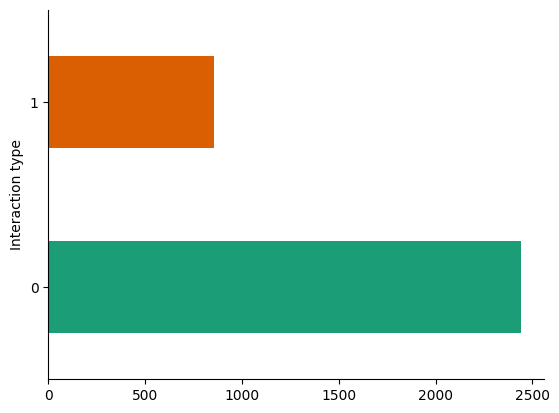

In [ ]:
tec_3.groupby('Interaction type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
tec_3.sample(10)

,user id,product id,Interaction type,Time stamp
2227,2228.0,a047a3c2aa91a3d30b71a97e14b0aacf,1,27/05/2023 10:00
2883,2884.0,94c16bb21348fbc2b240007f2f4d122d,1,13/12/2023 8:00
2270,2271.0,dc97e77c7d52828909c1c381b9658832,1,09/07/2023 10:00
2877,2878.0,a0c000e87e601da16137ee0f3b064f6b,1,07/12/2023 8:00
961,962.0,64a23649bd8bfc3a220823ec8c73a2c5,1,03/01/2023 10:00
839,840.0,265038f622f0d300f8b51ab47659b6d2,0,09/12/2023 8:00
1347,1348.0,9f863b9d2c71a1b82f51cf30cc3e7bee,0,24/12/2023 8:00
2079,2080.0,8a1eb3df06b4395b6ec8212324a64f17,0,30/12/2022 10:00
39,40.0,c3296d8ad42c3998c205f0dbca3998f3,1,18/11/2023 8:00
2248,2249.0,06882592ab421a06cfa517f611f8bf3c,1,17/06/2023 10:00


#MERGE

Genero la union de las tres tablas por medio de la tabla e_commerce que contiene las columnas 'user id' y 'product id'.

*   Conecto con la tabla "customer_details" por medio de la columna 'Customer ID'
*   Conecto con la tabla "product_details" por medio de la columna 'Uniqe Id'
Utilizo la union outter para traerme todos los datos y despues poder analizar todos en conjunto.
* Genero la union de las tres tablas por medio de la tabla e_commerce que contiene las columnas 'user id', 'product id'

In [ ]:
print(tpd_2.columns)

Index(['Uniqe Id', 'Category', 'Selling Price', 'Model Number',
       'About Product', 'Product Specification', 'Shipping Weight',
       'Product Dimensions', 'Image', 'Product Url', 'Is Amazon Seller'],
      dtype='object')


In [ ]:
print(tec_3.columns)

Index(['user id', 'product id', 'Interaction type', 'Time stamp'], dtype='object')


In [ ]:
print(tcd.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


In [ ]:
# @title Outer merge entre product_details(tpd_2) y e_commerce(tec_3)
merge_tpd_tec= pd.merge(tpd_2,tec_3,left_on='Uniqe Id', right_on= 'product id', how='outer')
merge_tpd_tec

,Uniqe Id,Category,Selling Price,Model Number,About Product,Product Specification,Shipping Weight,Product Dimensions,Image,Product Url,Is Amazon Seller,user id,product id,Interaction type,Time stamp
0,4c69b61db1fc16e7013b43fc926e502d,Sports & Outdoors | Outdoor Recreation | Skate...,$237.68,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,Y,1.0,4c69b61db1fc16e7013b43fc926e502d,1.0,10/10/2023 8:00
1,66d49bbed043f5be260fa9f7fbff5957,Toys & Games | Learning & Education | Science ...,$99.95,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4 pounds,14.7 x 11.1 x 10.2 inches 4.06 pounds,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Electronic-Circuits-Cla...,Y,2.0,66d49bbed043f5be260fa9f7fbff5957,0.0,11/10/2023 8:00
2,2c55cae269aebf53838484b0d7dd931a,Toys & Games | Arts & Crafts | Craft Kits,$34.99,NaN,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/3Doodler-Plastic-Innova...,Y,3.0,2c55cae269aebf53838484b0d7dd931a,0.0,12/10/2023 8:00
3,18018b6bc416dab347b1b7db79994afa,Toys & Games | Hobbies | Models & Model Kits |...,$28.91,142,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Guillow-Airplane-Design...,Y,4.0,18018b6bc416dab347b1b7db79994afa,0.0,13/10/2023 8:00
4,e04b990e95bf73bbe6a3fa09785d7cd0,Toys & Games | Puzzles | Jigsaw Puzzles,$17.49,62151,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Woodstock-Collage-500-p...,Y,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,0.0,14/10/2023 8:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
10293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
10294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
10295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [ ]:
merge_tpd_tec.value_counts(["Interaction type"])

Interaction type
0.0                 2439
1.0                  855
Name: count, dtype: int64

In [ ]:
# Calculo la cantidad de valores nulos por columna
merge_tpd_tec_nulos_por_columna = merge_tpd_tec.isnull().sum()

# Muestra la cantidad de nulos por columna
print(merge_tpd_tec_nulos_por_columna)

Uniqe Id                  295
Category                 1125
Selling Price             402
Model Number             2067
About Product             568
Product Specification    1927
Shipping Weight          1433
Product Dimensions       9818
Image                     295
Product Url               295
Is Amazon Seller          295
user id                  7298
product id               7298
Interaction type         7003
Time stamp               7298
dtype: int64


In [ ]:
# @title Outer merge del merge anterior(merge_tpd_tec) y customer_details(tcd)
full_merge= pd.merge(tcd,merge_tpd_tec,left_on='Customer ID', right_on= 'user id', how='outer')
full_merge

,Customer ID,Age,Gender,Item Purchased,Category_x,Purchase Amount (USD),Location,Size,Color,Season,...,Product Specification,Shipping Weight,Product Dimensions,Image,Product Url,Is Amazon Seller,user id,product id,Interaction type,Time stamp
0,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,Y,1.0,4c69b61db1fc16e7013b43fc926e502d,1.0,10/10/2023 8:00
1,2.0,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,...,Product Dimensions: 14.7 x 11.1 x 10.2...,4 pounds,14.7 x 11.1 x 10.2 inches 4.06 pounds,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Electronic-Circuits-Cla...,Y,2.0,66d49bbed043f5be260fa9f7fbff5957,0.0,11/10/2023 8:00
2,3.0,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/3Doodler-Plastic-Innova...,Y,3.0,2c55cae269aebf53838484b0d7dd931a,0.0,12/10/2023 8:00
3,4.0,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Guillow-Airplane-Design...,Y,4.0,18018b6bc416dab347b1b7db79994afa,0.0,13/10/2023 8:00
4,5.0,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Woodstock-Collage-500-p...,Y,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,0.0,14/10/2023 8:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
11194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
11195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
11196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [ ]:
full_merge.isnull().sum()

Customer ID                7298
Age                        7298
Gender                     7298
Item Purchased             7298
Category_x                 7298
Purchase Amount (USD)      7298
Location                   7298
Size                       7298
Color                      7298
Season                     7298
Review Rating              7298
Subscription Status        7298
Shipping Type              7298
Discount Applied           7298
Promo Code Used            7298
Previous Purchases         7298
Payment Method             7298
Frequency of Purchases     7298
Uniqe Id                   1196
Category_y                 2026
Selling Price              1303
Model Number               2968
About Product              1469
Product Specification      2828
Shipping Weight            2334
Product Dimensions        10719
Image                      1196
Product Url                1196
Is Amazon Seller           1196
user id                    8199
product id                 8199
Interact

In [ ]:
full_merge.isnull().sum()/full_merge.shape[0]

Customer ID               0.651724
Age                       0.651724
Gender                    0.651724
Item Purchased            0.651724
Category_x                0.651724
Purchase Amount (USD)     0.651724
Location                  0.651724
Size                      0.651724
Color                     0.651724
Season                    0.651724
Review Rating             0.651724
Subscription Status       0.651724
Shipping Type             0.651724
Discount Applied          0.651724
Promo Code Used           0.651724
Previous Purchases        0.651724
Payment Method            0.651724
Frequency of Purchases    0.651724
Uniqe Id                  0.106805
Category_y                0.180925
Selling Price             0.116360
Model Number              0.265047
About Product             0.131184
Product Specification     0.252545
Shipping Weight           0.208430
Product Dimensions        0.957225
Image                     0.106805
Product Url               0.106805
Is Amazon Seller    

In [ ]:
full_merge.value_counts(["Interaction type"])

Interaction type
0.0                 2439
1.0                  855
Name: count, dtype: int64

Descarto aquellas filas que no tienen dato en el campo de la variable objetivo ya que no podria determinar si finalmente se concreto o no la compra.
Armo una lista de columnas de texto con el nombre de las variables que quiero cambiar para cambiar las variables a 0 y 1


In [ ]:
# Elimino filas con valores nulos en 'Interaction type'
full_merge_2 = full_merge.dropna(subset=['Interaction type'])

#Utilizo la función drop para eliminar las variables de ID
full_merge_2 = full_merge_2.drop(["user id","product id","Uniqe Id","Customer ID"],axis =1)

#Armo una lista de columnas de texto con el nombre de las variables que quiero cambiar
text_columns = ['Image', 'Product Url','Is Amazon Seller']

# Aplica la transformación
for col in text_columns:
    full_merge_2[col] = np.where(full_merge_2[col].isna() | (full_merge_2[col] == ''), 0, 1)

# Muestra el DataFrame resultante
print(full_merge_2)

        Age Gender Item Purchased Category_x  Purchase Amount (USD)  \
0      55.0   Male         Blouse   Clothing                   53.0   
1      19.0   Male        Sweater   Clothing                   64.0   
2      50.0   Male          Jeans   Clothing                   73.0   
3      21.0   Male        Sandals   Footwear                   90.0   
4      45.0   Male         Blouse   Clothing                   49.0   
...     ...    ...            ...        ...                    ...   
11193   NaN    NaN            NaN        NaN                    NaN   
11194   NaN    NaN            NaN        NaN                    NaN   
11195   NaN    NaN            NaN        NaN                    NaN   
11196   NaN    NaN            NaN        NaN                    NaN   
11197   NaN    NaN            NaN        NaN                    NaN   

            Location Size      Color  Season  Review Rating  ... Model Number  \
0           Kentucky    L       Gray  Winter            3.1  ...  

In [ ]:
full_merge_2.isnull().sum()

Age                        295
Gender                     295
Item Purchased             295
Category_x                 295
Purchase Amount (USD)      295
Location                   295
Size                       295
Color                      295
Season                     295
Review Rating              295
Subscription Status        295
Shipping Type              295
Discount Applied           295
Promo Code Used            295
Previous Purchases         295
Payment Method             295
Frequency of Purchases     295
Category_y                 570
Selling Price              300
Model Number               780
About Product              357
Product Specification      746
Shipping Weight            629
Product Dimensions        3186
Image                        0
Product Url                  0
Is Amazon Seller             0
Interaction type             0
Time stamp                 295
dtype: int64

In [ ]:
full_merge_2.isnull().sum()/full_merge_2.shape[0]

Age                       0.089557
Gender                    0.089557
Item Purchased            0.089557
Category_x                0.089557
Purchase Amount (USD)     0.089557
Location                  0.089557
Size                      0.089557
Color                     0.089557
Season                    0.089557
Review Rating             0.089557
Subscription Status       0.089557
Shipping Type             0.089557
Discount Applied          0.089557
Promo Code Used           0.089557
Previous Purchases        0.089557
Payment Method            0.089557
Frequency of Purchases    0.089557
Category_y                0.173042
Selling Price             0.091075
Model Number              0.236794
About Product             0.108379
Product Specification     0.226472
Shipping Weight           0.190953
Product Dimensions        0.967213
Image                     0.000000
Product Url               0.000000
Is Amazon Seller          0.000000
Interaction type          0.000000
Time stamp          

In [ ]:
full_merge_2.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Image,Product Url,Is Amazon Seller,Interaction type
count,2999.000000,2999.000000,2999.000000,2999.000000,3294.000000,3294.000000,3294.000000,3294.000000
mean,44.064021,59.653218,3.749783,25.647216,0.910443,0.910443,0.910443,0.259563
std,15.284927,23.800240,0.714534,14.411316,0.285589,0.285589,0.285589,0.438461
min,18.000000,20.000000,2.500000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,38.000000,3.100000,13.000000,1.000000,1.000000,1.000000,0.000000
50%,44.000000,60.000000,3.700000,26.000000,1.000000,1.000000,1.000000,0.000000
75%,57.000000,81.000000,4.400000,38.000000,1.000000,1.000000,1.000000,1.000000
max,70.000000,100.000000,5.000000,50.000000,1.000000,1.000000,1.000000,1.000000


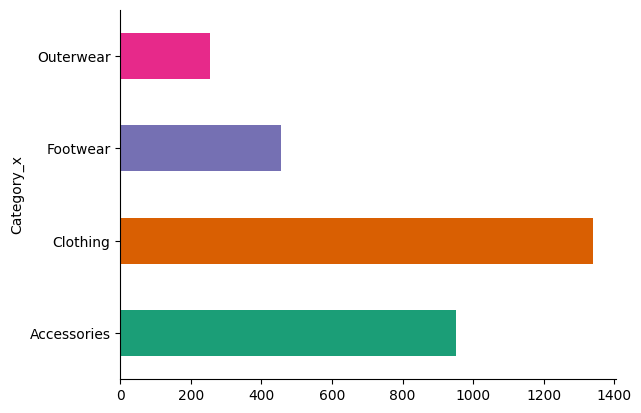

In [ ]:
full_merge_2.groupby('Category_x').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Gender', ylabel='Count'>

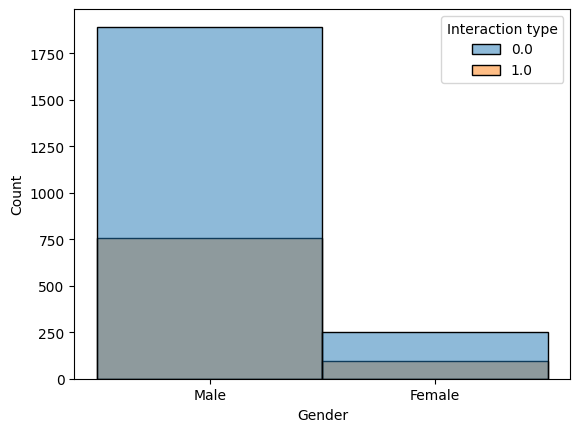

In [ ]:
#sns.histplot(full_merge_2,x='Interaction type',hue='Category_x',bins=2)
#sns.histplot(full_merge_2,x='Age',hue='Category_x',bins=20)
sns.histplot(full_merge_2,x='Gender',hue='Interaction type',bins=20)


Se transformó la columna “Shipping Weight” para que sea numérica utilizando regex para separar el número de la unidad de medida y en donde figura “pounds”(Libra) que se multiplicará por 16 para pasar a “ounces”(Onza)

In [ ]:
def transform_weight(weight):
    if pd.isna(weight):
        return weight
    pounds_match = re.match(r'(\d*\.?\d+|\d+)\s*pounds', weight, re.IGNORECASE)  # ignora el valor "pounds"
    ounces_match = re.match(r'(\d*\.?\d+|\d+)\s*ounces', weight, re.IGNORECASE)  # ignora el valor "ounces"
    if pounds_match:
        num_str = pounds_match.group(1)
        try:
            return float(num_str) * 16  # convierto libras a onzas
        except ValueError:
            return weight  # devuelve el valor original si falla
    elif ounces_match:
        num_str = ounces_match.group(1)
        try:
            return float(num_str)  # dejo las onzas sin modificar
        except ValueError:
            return weight  # devuelve el valor original si falla
    else:
        return weight  # si no machea devuelve el valor original

# Aplicar la transformación a la columna 'Shipping Weight'
full_merge_2['Shipping Weight'] = full_merge_2['Shipping Weight'].apply(transform_weight)

# Eliminar filas con valores no numéricos en 'Shipping Weight' (opcional)
full_merge_2 = full_merge_2[pd.to_numeric(full_merge_2['Shipping Weight'], errors='coerce').notna()]

print(full_merge_2)

       Age  Gender Item Purchased Category_x  Purchase Amount (USD)  \
0     55.0    Male         Blouse   Clothing                   53.0   
1     19.0    Male        Sweater   Clothing                   64.0   
2     50.0    Male          Jeans   Clothing                   73.0   
3     21.0    Male        Sandals   Footwear                   90.0   
4     45.0    Male         Blouse   Clothing                   49.0   
...    ...     ...            ...        ...                    ...   
2993  32.0  Female         Jacket  Outerwear                   21.0   
2994  69.0  Female        Sweater   Clothing                  100.0   
2995  29.0  Female          Jeans   Clothing                   96.0   
2997  41.0  Female        Sweater   Clothing                   40.0   
2998  31.0  Female         Hoodie   Clothing                   53.0   

           Location Size      Color  Season  Review Rating  ... Model Number  \
0          Kentucky    L       Gray  Winter            3.1  ...    

In [ ]:
full_merge_2

,Age,Gender,Item Purchased,Category_x,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Model Number,About Product,Product Specification,Shipping Weight,Product Dimensions,Image,Product Url,Is Amazon Seller,Interaction type,Time stamp
0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,...,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,171.2,NaN,1,1,1,1.0,10/10/2023 8:00
1,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,...,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,64.0,14.7 x 11.1 x 10.2 inches 4.06 pounds,1,1,1,0.0,11/10/2023 8:00
2,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,...,NaN,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8,NaN,1,1,1,0.0,12/10/2023 8:00
3,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,...,142,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4,NaN,1,1,1,0.0,13/10/2023 8:00
4,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,...,62151,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4,NaN,1,1,1,0.0,14/10/2023 8:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,32.0,Female,Jacket,Outerwear,21.0,Kansas,L,Indigo,Spring,4.2,...,Football-01,Make sure this fits by entering your model num...,ProductDimensions:7.5x7.4x3.9inches|ItemWeight...,8.8,NaN,1,1,1,0.0,14/12/2023 8:00
2994,69.0,Female,Sweater,Clothing,100.0,Nevada,S,White,Winter,3.5,...,DTXC3504,Make sure this fits by entering your model num...,ProductDimensions:4.5x2.5x4.5inches|ItemWeight...,11.2,NaN,1,1,1,0.0,15/12/2023 8:00
2995,29.0,Female,Jeans,Clothing,96.0,Virginia,M,Orange,Summer,2.5,...,241642,Make sure this fits by entering your model num...,ProductDimensions:10x8x4inches|ItemWeight:3.2o...,4.2,NaN,1,1,1,0.0,16/12/2023 8:00
2997,41.0,Female,Sweater,Clothing,40.0,Idaho,S,Yellow,Spring,2.7,...,500785023,Make sure this fits by entering your model num...,ProductDimensions:3.8x26x16.5inches|ItemWeight...,4.2,NaN,1,1,1,0.0,18/12/2023 8:00
